![](https://i.imgur.com/0AUxkXt.png)

# Lab 2 - Pandas & Seaborn

## Import libraries

In [2]:
# Config
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%config InlineBackend.figure_format ='retina'
%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Import data

In this Lab we will use a dataset from seaborn library. The dataset contains tips data from different customers females and males, smokers and non smokers, from days, dinner or lunch and from different table size.

In [4]:
# Run this code
tips = sns.load_dataset('tips')

### Overview

**Show the first 3 rows of the data**

In [5]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


### Show the last 2 rows of the data

In [6]:
tips.tail(2)

,total_bill,tip,sex,smoker,day,time,size
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### Show 4 randoms rows

In [7]:
tips.sample(4)

,total_bill,tip,sex,smoker,day,time,size
221,13.42,3.48,Female,Yes,Fri,Lunch,2
70,12.02,1.97,Male,No,Sat,Dinner,2
43,9.68,1.32,Male,No,Sun,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2


### Print a concise summary of the data

Print information about the data including the index dtype and column dtypes, non-null values and memory usage.

In [8]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
dtypes: category(4), float64(2), int64(1)
memory usage: 7.2 KB


### Generate descriptive statistics

A descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution, excluding NaN values.

In [9]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


## EDA - Exploratory Data Analysis

**What is the min/max of tip?**

In [10]:
tips["tip"].min()
tips["tip"].max()

1.0

10.0

**The restaurant is open on which days of the week?**

*Hint: unique values of the column `day`*

In [11]:
tips["day"].unique()

[Sun, Sat, Thur, Fri]
Categories (4, object): [Sun, Sat, Thur, Fri]

**List of unique values in column `time`**

In [12]:
tips["time"].unique()

[Dinner, Lunch]
Categories (2, object): [Dinner, Lunch]

**What is the range of table size?**

In [13]:
tips["size"].max()
tips["size"].min()

6

1

**How many man/woman paid for the dish?**


In [14]:
len(tips[tips["sex"] == "Male"])
len(tips[tips["sex"] == "Female"])

157

87

**What is the percentage of smoker table and their revenue?**

In [15]:
len(tips[tips["smoker"] == 'Yes'])/len(tips)*100

38.114754098360656

**List 3 tables that have the most expensive bill**

In [16]:
tips.sort_values("total_bill", ascending = False).head(3)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4


### Group by - Example

**What is the best day to work - maximum tips (sum and percents)?**

In [17]:
tips2 = tips.groupby('day').sum()
tips2['percent'] = tips2['tip'] / tips2['total_bill'] * 100
tips2

,total_bill,tip,size,percent
day,,,,
Thur,1096.33,171.83,152,15.673201
Fri,325.88,51.96,40,15.944519
Sat,1778.40,260.40,219,14.642375
Sun,1627.16,247.39,216,15.203791


**Your turn: Who eats more (and tips more)? smokers or non smokers?**

In [18]:
tips3 = tips.groupby("smoker").sum()
tips3

,total_bill,tip,size
smoker,,,
Yes,1930.34,279.81,224
No,2897.43,451.77,403


### Data Visualization using Seaborn

**Visualize # of tables per day**

*Hint: using the seaborn's function **countplot()** with `x=day` and `data=tips`*

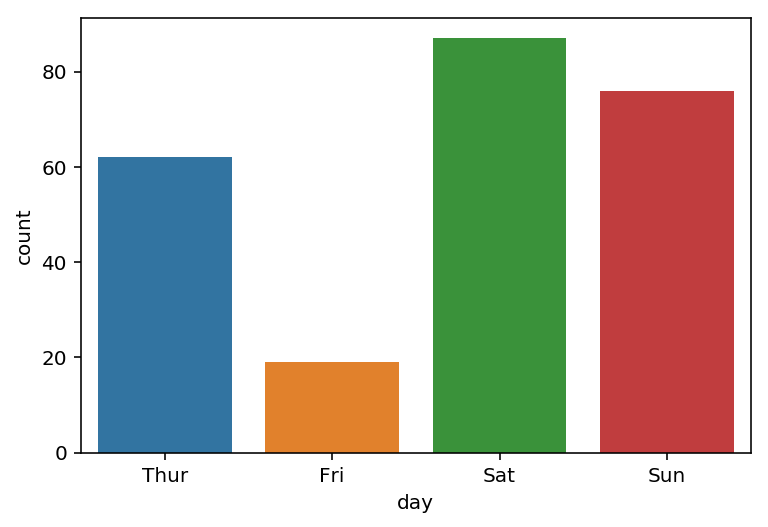

In [19]:
sns.countplot(x = "day", data = tips)

**Visualize # of smoker and non-smoker tables**

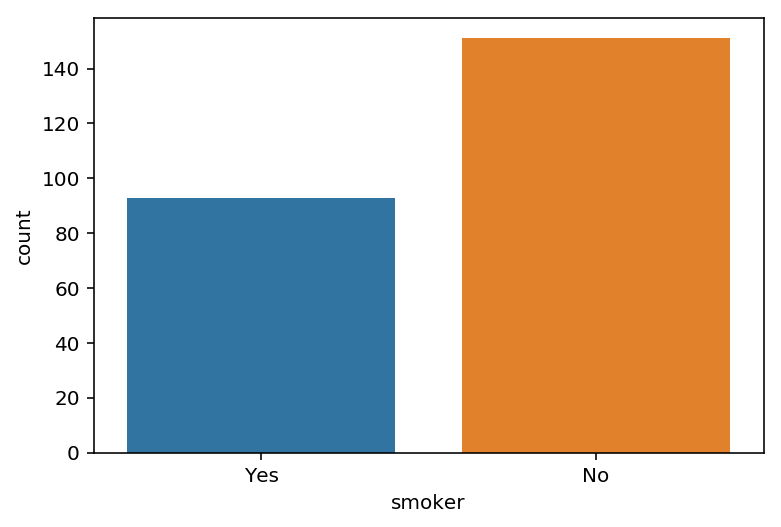

In [20]:
sns.countplot(x = "smoker", data = tips)

**Visualize # of male/female customers who pay**

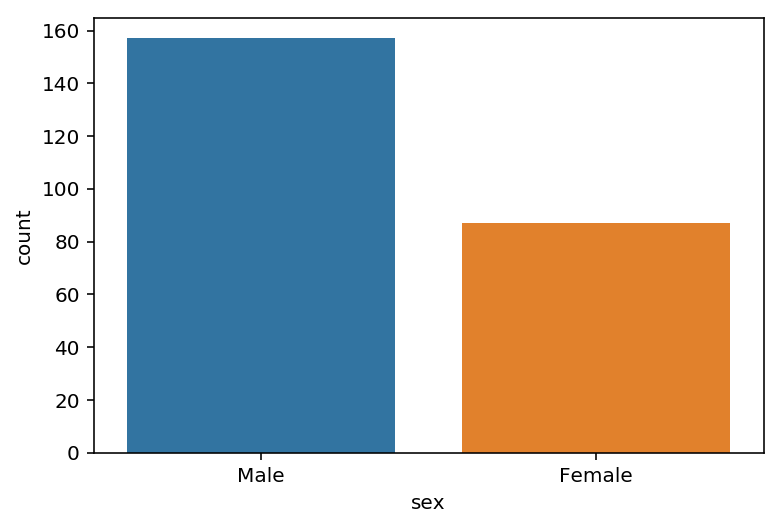

In [21]:
sns.countplot(x = "sex", data = tips)

**Analyze the distribution of payments of male and female in different days**

*Hint: countplot with `hue='sex'`*

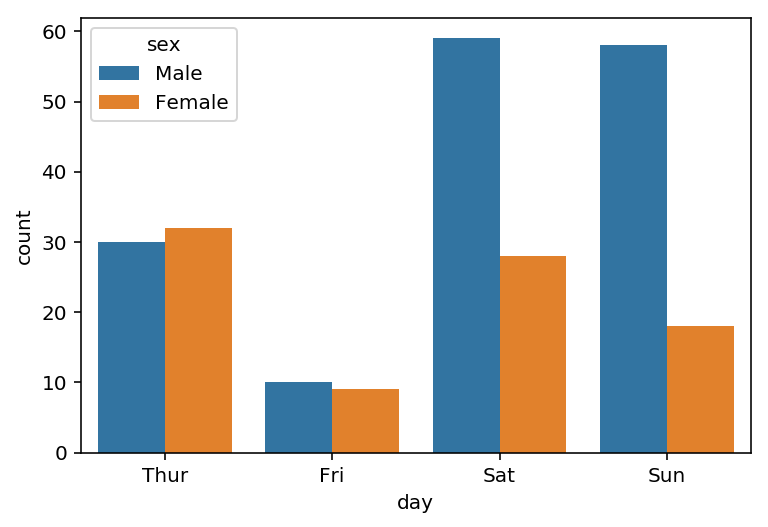

In [22]:
sns.countplot(x = "day", hue = "sex", data = tips)

**Analyze the # of tables in different time (lunch or dinner) and days**

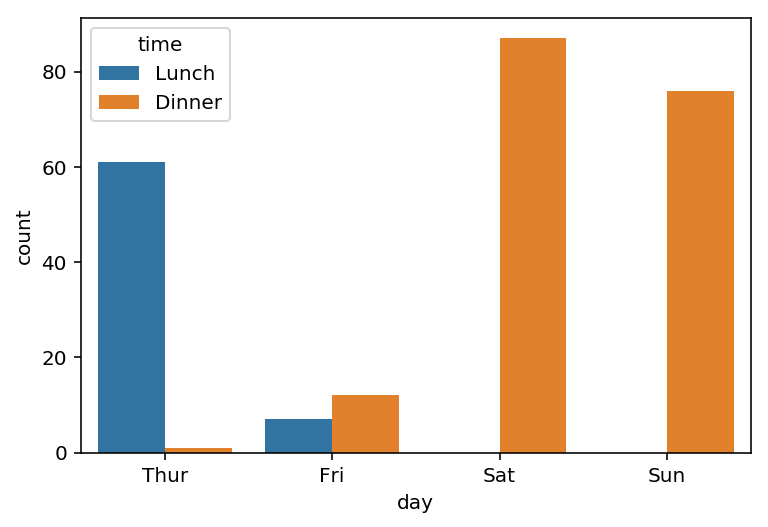

In [23]:
sns.countplot(x = "day", hue = "time", data = tips)

**Example: Visualize the distribution of the total bill**


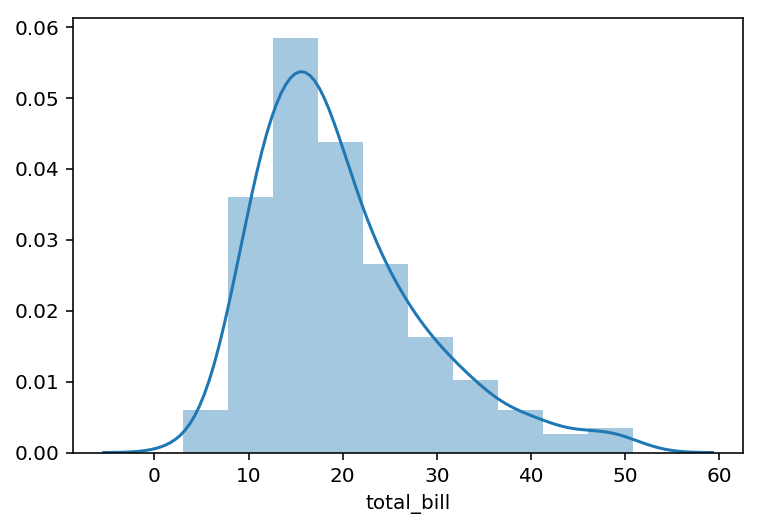

In [24]:
sns.distplot(tips['total_bill'], bins=10)

**Visualize the distribution of the tip**

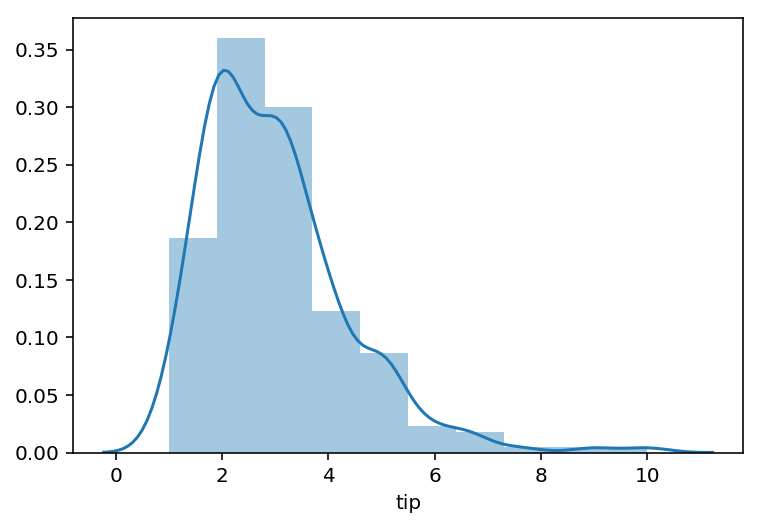

In [25]:
sns.distplot(tips['tip'], bins=10)

**Example: Scatter plot of tip and total bill**

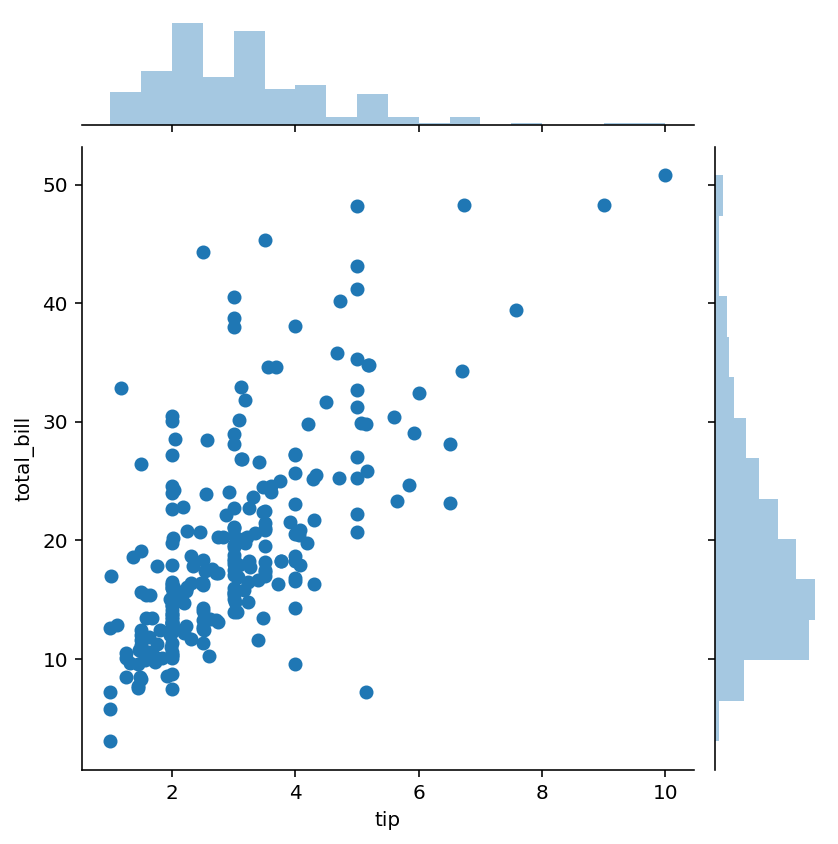

In [26]:
sns.jointplot(x='tip', y='total_bill', data=tips)

**Add one more parameter `kind='hex'` to the previous   `jointplot()` function**

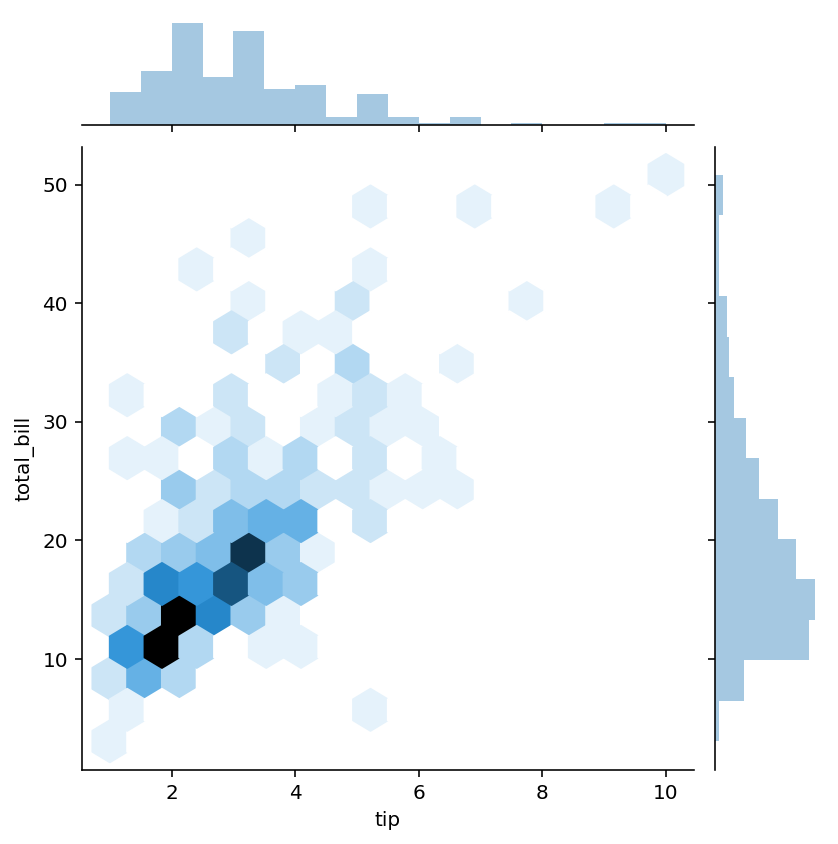

In [27]:
sns.jointplot(x='tip', y='total_bill', data=tips, kind = 'hex')

**Let's try with `kind='kde'` (KDE - Kernel Density Estimation)**

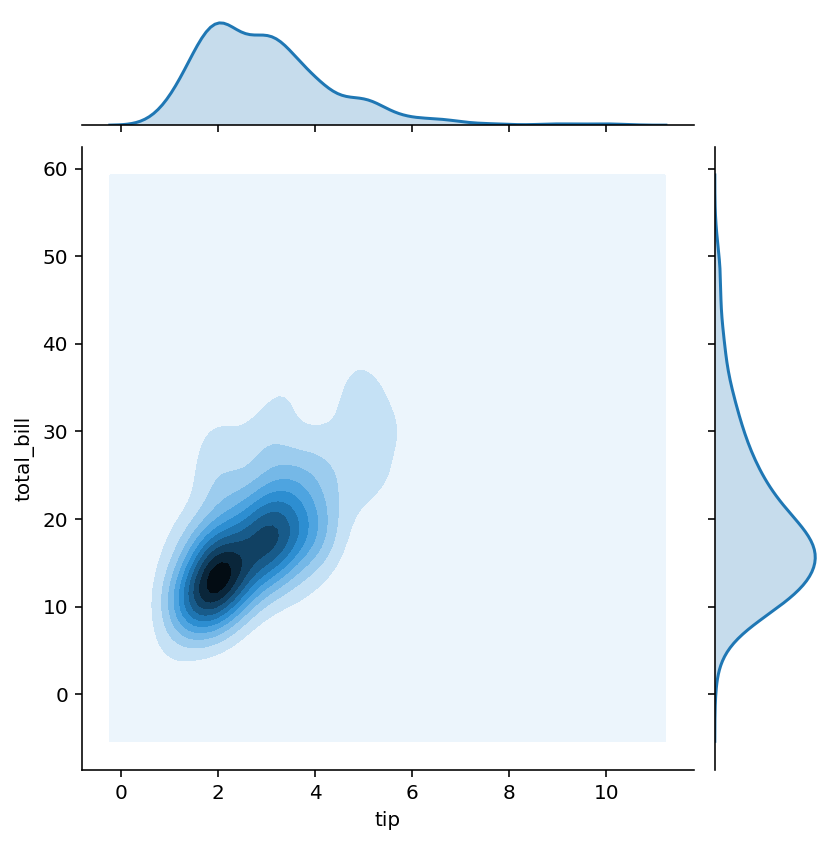

In [28]:
sns.jointplot(x='tip', y='total_bill', data=tips, kind = 'kde')

**Analyze the relationship between `size` and `tip`**

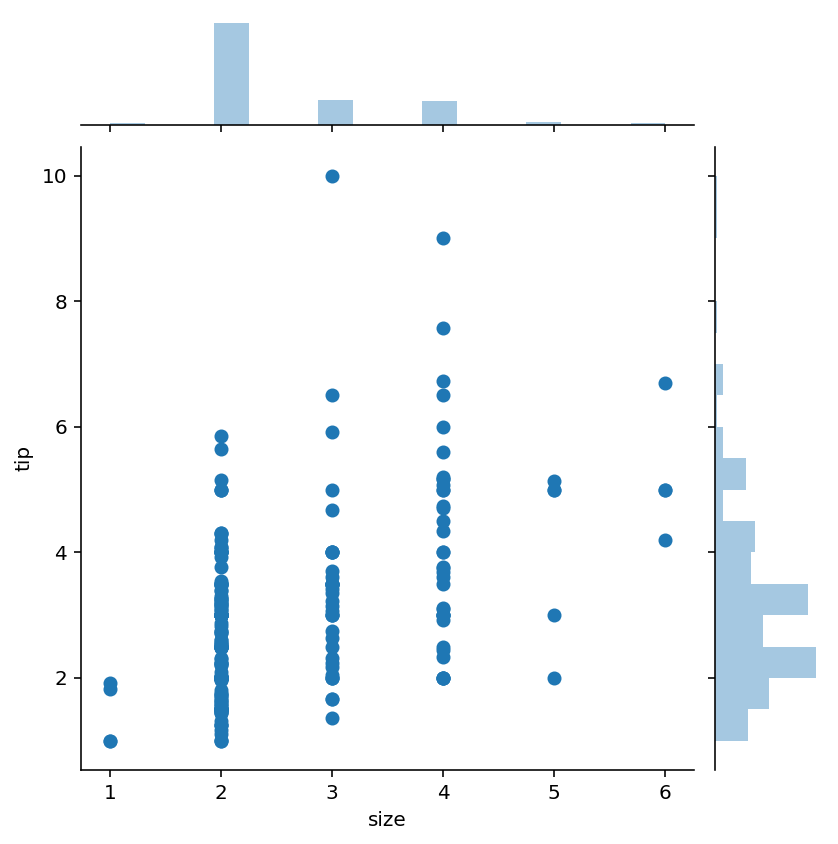

In [29]:
sns.jointplot(x='size', y='tip', data=tips)

**Correlation Matrix**

Show the correlation matrix and comfirm the analytics you have from previous steps.

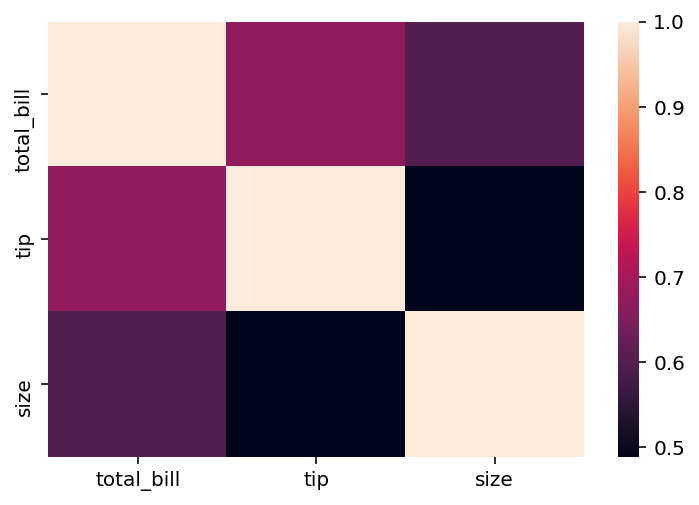

In [30]:
sns.heatmap(tips.corr())

**Box plot, Swarm plot and Violin plot**

![](https://i.imgur.com/5Lo17qp.png)

**Implement the seaborn's function `boxplot()` with params: `x='sex'`, `y='total_bill'` and `data=tips`**

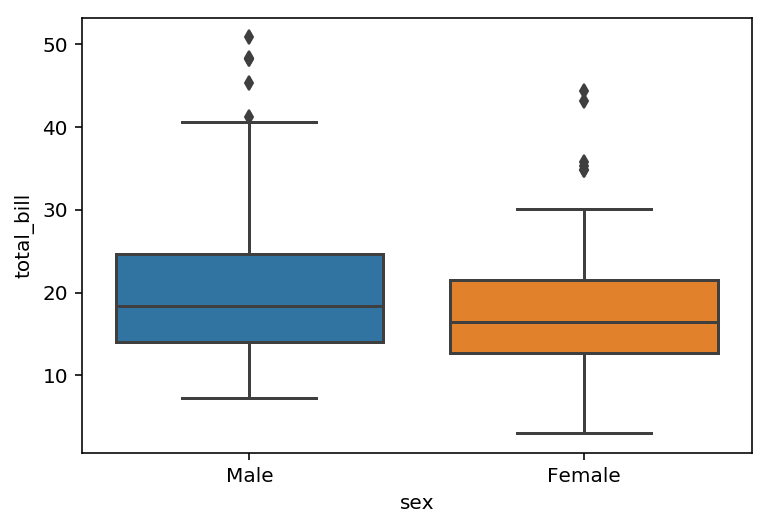

In [31]:
sns.boxplot(x = 'sex', y = 'total_bill', data = tips)

**Add `hue='smoker'` to the previous `boxplot()`**

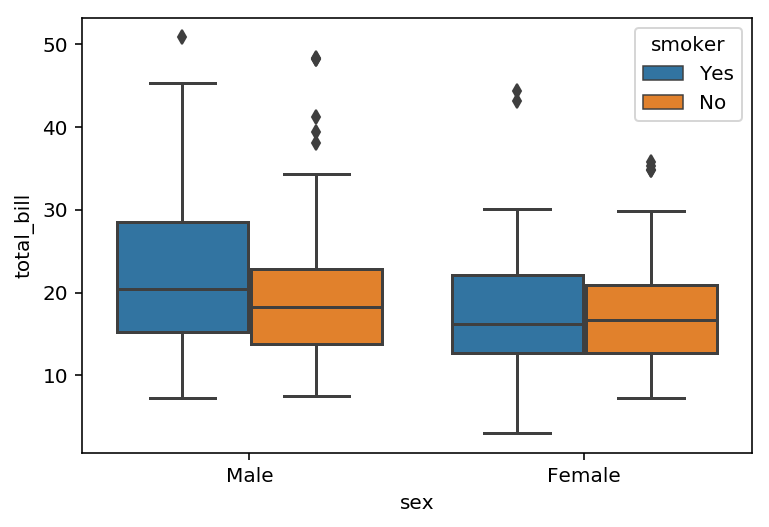

In [32]:
sns.boxplot(x = 'sex', y = 'total_bill', hue = 'smoker', data = tips)

**Implement `swarmplot()` with: `x='day', y='tip', hue='smoker', data=tips`**

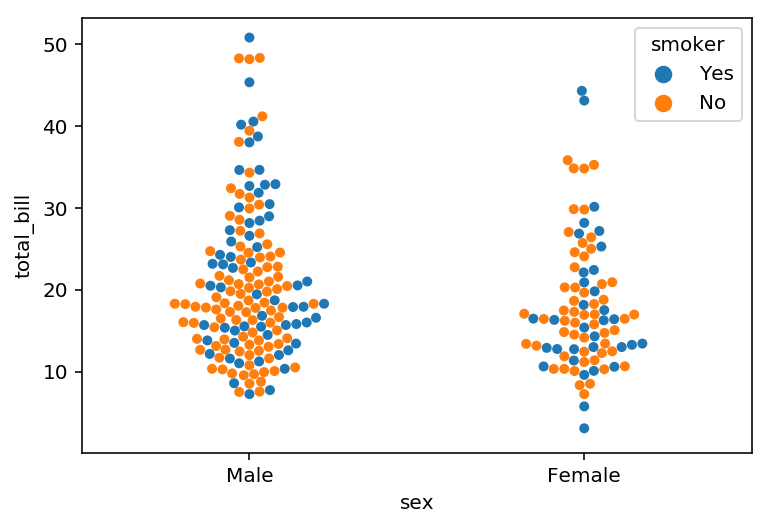

In [33]:
sns.swarmplot(x = 'sex', y = 'total_bill', hue = 'smoker', data = tips)

**Implement previous chart with `violinplot()`**

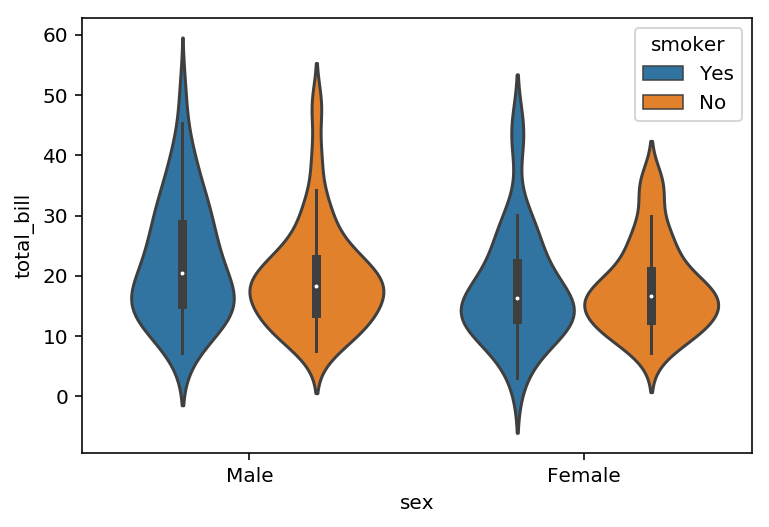

In [34]:
sns.violinplot(x = 'sex', y = 'total_bill', hue = 'smoker', data = tips)

### Bonus

**Total revenue per day**

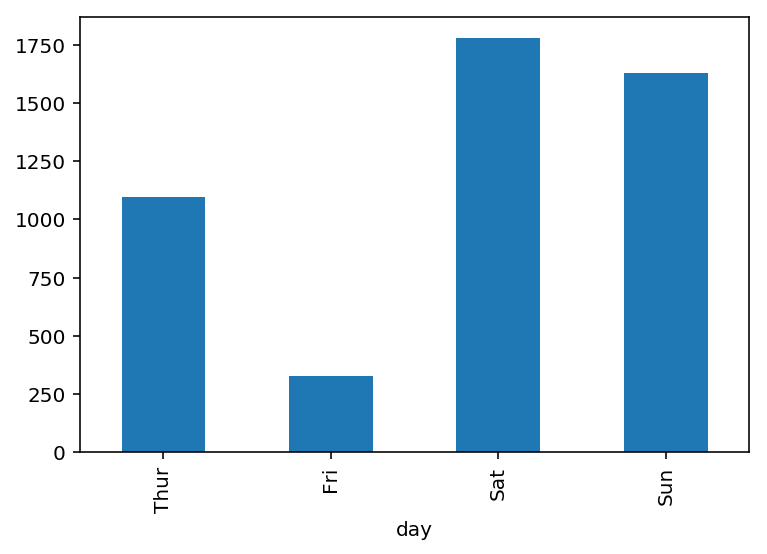

In [35]:
tips.groupby('day').sum()['total_bill'].plot(kind='bar')

**Pie chart of table size in percentage**

([<matplotlib.patches.Wedge at 0x1a1c3c9e80>,
 [Text(-0.056626627085919694, 1.0985414990362778, '1'),
  Text(-0.9430460715453527, -0.5662721138665383, '2'),
  Text(1.094169869121777, -0.11310303933154729, '3'),
  Text(0.7154691965935787, 0.8355260790219172, '4'),
  Text(0.18325940461083456, 1.0846271205449745, '5'),
  Text(0.05662661422930998, 1.0985414996989986, '6')],
 [Text(-0.030887251137774376, 0.5992044540197878, '1.6%'),
  Text(-0.514388766297465, -0.3088756984726572, '63.9%'),
  Text(0.5968199286118783, -0.0616925669081167, '15.6%'),
  Text(0.39025592541467924, 0.45574149764831845, '15.2%'),
  Text(0.09995967524227338, 0.5916147930245315, '2.0%'),
  Text(0.030887244125078168, 0.5992044543812719, '1.6%')])

(-1.1066166717463504,
 1.1124171052817988,
 -1.104200686659928,
 1.100200032908584)

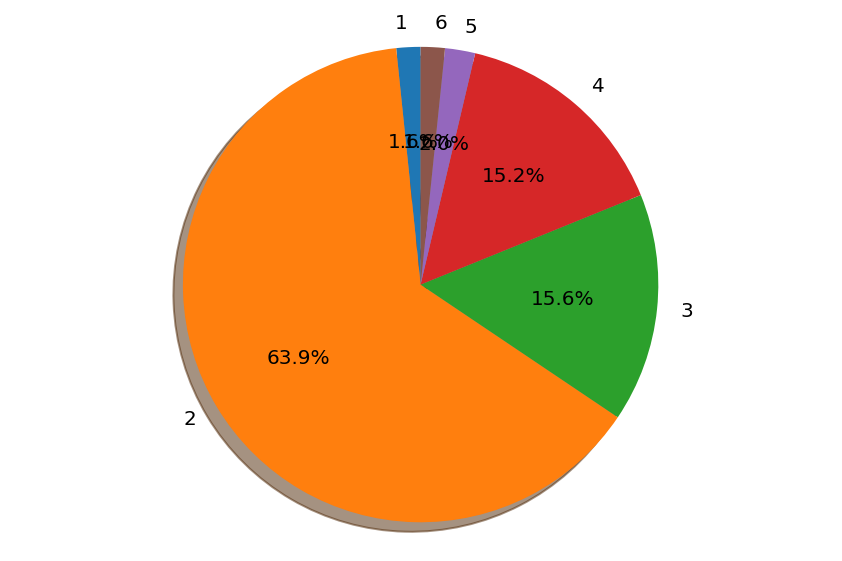

In [36]:
labels = []
sizes = []
explode = []

labels = tips['size'].value_counts().sort_index();

for index, size in enumerate(labels):
    sizes.append(size)
    if size == 3:
        explode.append(0.2)
    else:
        explode.append(0)
        
_, ax1 = plt.subplots()
ax1.pie(labels.values,
        explode = explode,
        labels = labels.index,
        autopct = '%1.1f%%',
        shadow = True,
        startangle = 90)

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()

## Great Job!!